In [1]:
import pandas as p
dataset=p.read_csv('insurance_pre.csv')
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [10]:
dataset=p.get_dummies(dataset,drop_first=True)
print("dataset {}\n".format(dataset))

dataset       age     bmi  children      charges  sex_male  smoker_yes
0      19  27.900         0  16884.92400         0           1
1      18  33.770         1   1725.55230         1           0
2      28  33.000         3   4449.46200         1           0
3      33  22.705         0  21984.47061         1           0
4      32  28.880         0   3866.85520         1           0
...   ...     ...       ...          ...       ...         ...
1333   50  30.970         3  10600.54830         1           0
1334   18  31.920         0   2205.98080         0           0
1335   18  36.850         0   1629.83350         0           0
1336   21  25.800         0   2007.94500         0           0
1337   61  29.070         0  29141.36030         0           1

[1338 rows x 6 columns]



In [11]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [14]:
independent=dataset[['age', 'bmi', 'children', 'sex_male', 'smoker_yes']]
dependent=dataset[['charges']]
print('independent', independent)
print('dependent',dependent)

independent       age     bmi  children  sex_male  smoker_yes
0      19  27.900         0         0           1
1      18  33.770         1         1           0
2      28  33.000         3         1           0
3      33  22.705         0         1           0
4      32  28.880         0         1           0
...   ...     ...       ...       ...         ...
1333   50  30.970         3         1           0
1334   18  31.920         0         0           0
1335   18  36.850         0         0           0
1336   21  25.800         0         0           0
1337   61  29.070         0         0           1

[1338 rows x 5 columns]
dependent           charges
0     16884.92400
1      1725.55230
2      4449.46200
3     21984.47061
4      3866.85520
...           ...
1333  10600.54830
1334   2205.98080
1335   1629.83350
1336   2007.94500
1337  29141.36030

[1338 rows x 1 columns]


In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(independent, dependent, test_size=0.90,random_state=0)

In [18]:
print('X_train :',X_train)
print('y_train :', y_train)
print('X_test: ', X_test)
print('y_test :', y_test)

X_train :       age     bmi  children  sex_male  smoker_yes
1198   40  29.355         1         1           0
275    47  26.600         2         0           0
806    40  41.420         1         0           0
1152   43  32.560         3         0           1
1206   59  34.800         2         0           0
...   ...     ...       ...       ...         ...
763    27  26.030         0         1           0
835    42  35.970         2         1           0
1216   40  25.080         0         1           0
559    19  35.530         0         1           0
684    33  18.500         1         0           0

[133 rows x 5 columns]
y_train :           charges
1198   6393.60345
275    9715.84100
806   28476.73499
1152  40941.28540
1206  36910.60803
...           ...
763    3070.80870
835    7160.33030
1216   5415.66120
559    1646.42970
684    4766.02200

[133 rows x 1 columns]
X_test:        age     bmi  children  sex_male  smoker_yes
578    52  30.200         1         1           0
610    

In [20]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)


LinearRegression()

In [23]:
weight=regressor.coef_
bias=regressor.intercept_

In [25]:
print('weight : ', weight)
print('bias : ',bias)

weight :  [[  280.81984279   379.39824196   809.70252411   307.30895679
  26278.64019248]]
bias :  [-14607.27883606]


In [27]:
y_pred=regressor.predict(X_test)
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)
print('r_score', r_score)

r_score 0.7270899256752571


In [28]:
import pickle
filename="finalized_model_Mul_linear.sav"
pickle.dump(regressor,open(filename,'wb'))

In [30]:
loaded_model=pickle.load(open("finalized_model_Mul_linear.sav",'rb'))
result=loaded_model.predict([[578,52,30.200,1,1]])
print('result', result)

result [[218474.26425844]]


C:\Users\W3TECH\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [32]:
from sklearn.preprocessing import StandardScaler #this is for SVM 
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
print('X_train',X_train)

X_train [[ 0.0338945  -0.09556521 -0.01292719  0.93447281 -0.52805885]
 [ 0.55982411 -0.52251789  0.84673109 -1.07012209 -0.52805885]
 [ 0.0338945   1.77419312 -0.01292719 -1.07012209 -0.52805885]
 [ 0.2592929   0.40112567  1.70638938 -1.07012209  1.89372831]
 [ 1.46141773  0.74826688  0.84673109 -1.07012209 -0.52805885]
 [-1.54389434 -0.21257039  3.42570595 -1.07012209 -0.52805885]
 [-0.19150391 -0.02660189 -0.87258548  0.93447281 -0.52805885]
 [-0.71743352  0.52045546 -0.01292719 -1.07012209 -0.52805885]
 [ 1.61168333  0.94973276  1.70638938  0.93447281 -0.52805885]
 [ 1.68681614 -0.57055976 -0.87258548 -1.07012209  1.89372831]
 [ 0.1841601  -0.79217222 -0.87258548  0.93447281 -0.52805885]
 [-0.0412383   1.96558571 -0.87258548  0.93447281 -0.52805885]
 [ 1.31115213  0.18416242 -0.87258548 -1.07012209  1.89372831]
 [-0.34176951  0.67387948  1.70638938  0.93447281 -0.52805885]
 [-1.16823033  0.31589011 -0.87258548  0.93447281 -0.52805885]
 [ 0.1841601   0.44916754 -0.87258548 -1.070122

In [76]:
from sklearn.svm import SVR
regressor=SVR(kernel="sigmoid",C=3000)
regressor.fit(X_train,y_train)

C:\Users\W3TECH\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=3000, kernel='sigmoid')

In [62]:
bias=regressor.intercept_
print(bias)

[8869.47776386]


In [72]:
regressor.support_

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132])

In [77]:
y_pred=regressor.predict(X_test)
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)
print(r_score)

0.6268738727885909


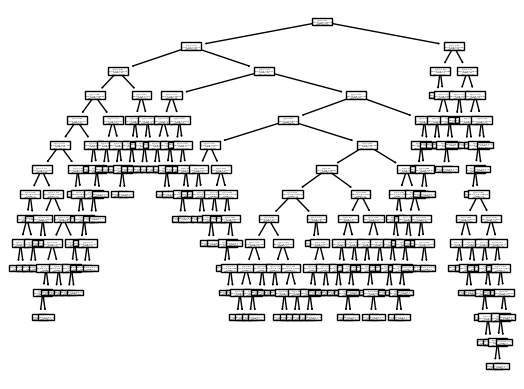

In [95]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion='absolute_error', splitter='random')
regressor=regressor.fit(X_train,y_train)
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [96]:
y_pred=regressor.predict(X_test)
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)
print(r_score)

0.4611776889956879
